<a href="https://colab.research.google.com/github/SUDHANSHUKADAM/Personalized-Student-Engagement-Medium-Recommendation-System/blob/main/pserms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if dataset is not None:
    for row in dataset:
        print(row)


['video lectures', '10:00', '8', 'video lectures']
['pdf', '11:00', '9', 'pdf']
['pdf', '12:00', '5', 'pdf']
['video lectures', '13:00', '4', 'video lectures']
['pdf', '14:00', '3', 'video lectures']
['pdf', '15:00', '9', 'pdf']
['pdf', '16:00', '8', 'pdf']
['pdf', '17:00', '7', 'video lectures']
['pdf', '18:00', '8', 'pdf']
['video lectures', '10:00', '9', 'pdf']
['pdf', '11:00', '5', 'pdf']
['video lectures', '12:00', '4', 'pdf']
['video lectures', '13:00', '3', 'pdf']
['video lectures', '14:00', '2', 'pdf']
['pdf', '15:00', '8', 'video lectures']
['pdf', '16:00', '9', 'video lectures']
['pdf', '17:00', '9', 'video lectures']
['video lectures', '18:00', '8', 'video lectures']
['pdf', '12:00', '8', 'video lectures']
['video lectures', '16:00', '7', 'pdf']
['pdf', '18:00', '8', 'video lectures']
['video lectures', '19:00', '7', 'video lectures']
['video lectures', '20:00', '6', 'pdf']
['pdf', '15:00', '5', 'pdf']


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import csv

# Function to read dataset from a CSV file
def read_dataset(file_path):
    dataset = []
    try:
        with open(file_path, 'r', newline='') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                dataset.append(row)
        return dataset
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None
    except Exception as e:
        print("Error occurred while reading the dataset:", e)
        return None

# Function to write dataset to a CSV file
def write_dataset(file_path, dataset):
    try:
        with open(file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Preferred Medium Module 1", "Time Taken", "Score", "Preferred Medium Module 2"])
            writer.writerows(dataset)
        print("Dataset updated and saved successfully.")
    except Exception as e:
        print("Error occurred while writing the dataset:", e)

# Function to preprocess the dataset
def preprocess_dataset(dataset):
    if dataset is not None:
        X_train = []
        y_train = []
        medium_mapping = {'pdf': 0, 'ppt': 1, 'video lectures': 2}

        for row in dataset:
            try:
                time_taken = float(row[1])
                score = float(row[2])
                preferred_medium_module1 = row[0]
                X_train.append([time_taken, score])
                y_train.append(medium_mapping[preferred_medium_module1])
            except ValueError:
                print(f"Skipping row: {row}. Unable to parse numerical data.")

        X_train = np.array(X_train)
        y_train = np.array(y_train)
        return X_train, y_train
    else:
        return None, None

# Function to train KNN model
def train_knn_model(X_train, y_train, k=3):
    if X_train is not None and y_train is not None:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        return knn_model
    else:
        return None

# Function to recommend medium for next module
def recommend_medium_for_next_module(user_data_module1, knn_model, medium_mapping):
    if user_data_module1 is not None and knn_model is not None and medium_mapping is not None:
        # Extracting features (time taken, score) from user's data in module 1
        X_user_module1 = user_data_module1[:, :2].astype(float)

        # Encoding preferred medium in module 1 for user data
        user_medium_module1 = medium_mapping[user_data_module1[:, 2][0]]

        # Finding the k-nearest neighbors
        _, indices = knn_model.kneighbors(X_user_module1)

        # Getting preferred mediums of the nearest neighbors
        nearest_mediums = y_train[indices[0]]

        # Recommending the medium for the next module based on the majority preferred medium among neighbors
        recommended_medium = np.argmax(np.bincount(nearest_mediums))

        # Inverse mapping of the numerical value of the recommended medium back to its original form
        recommended_medium = [key for key, value in medium_mapping.items() if value == recommended_medium][0]

        return recommended_medium
    else:
        return None

# Sample dataset provided within the code (preferred medium in module 1, time taken, score in test 1, preferred medium in module 2)
# Modify this dataset according to your actual data
dataset_file = "dataset.csv"  # Provide the path to your dataset file

# Read dataset from file
dataset = read_dataset(dataset_file)

# Preprocess the dataset
X_train, y_train = preprocess_dataset(dataset)

# Train KNN model
knn_model = train_knn_model(X_train, y_train)

# User's data for module 1 (time taken, score, preferred medium)
user_data_module1 = np.array([[13, 78, 'pdf']])  # Example user data

# Append user input to dataset
user_input = [user_data_module1[0][2], str(user_data_module1[0][0]), str(user_data_module1[0][1]), ""]  # User input row
dataset.append(user_input)

# Write updated dataset to file
write_dataset(dataset_file, dataset)

# Preprocess updated dataset
X_train, y_train = preprocess_dataset(dataset)

# Train KNN model with updated dataset
knn_model = train_knn_model(X_train, y_train)

# Recommend medium for next module
recommended_medium = recommend_medium_for_next_module(user_data_module1, knn_model, medium_mapping)

if recommended_medium is not None:
    print("Recommended medium for next module:", recommended_medium)
else:
    print("Error occurred while recommending medium for next module.")


Dataset updated and saved successfully.
Recommended medium for next module: pdf


Accuracy: 0.81
Precision: 0.8791208791208791
Recall: 0.7476635514018691
F1 Score: 0.808080808080808
Confusion Matrix:
 [[82 11]
 [27 80]]
Mean Absolute Error: 0.19
Mean Squared Error: 0.19
Root Mean Squared Error: 0.43588989435406733
R-squared: 0.23625766254647762


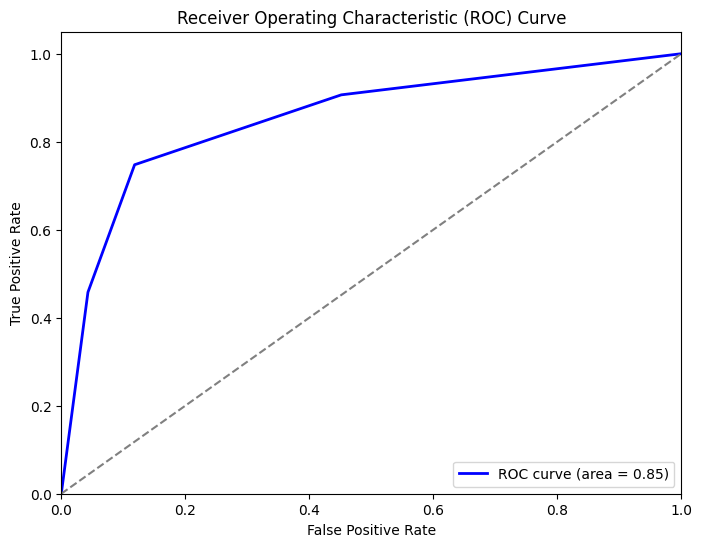

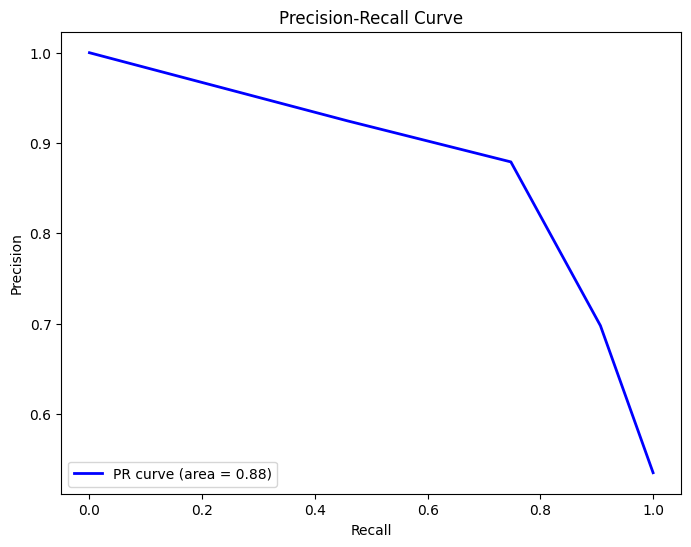

[learning_curve] Training set sizes: [ 80 160 240 320 400 480 560 640 720 800]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.5s finished


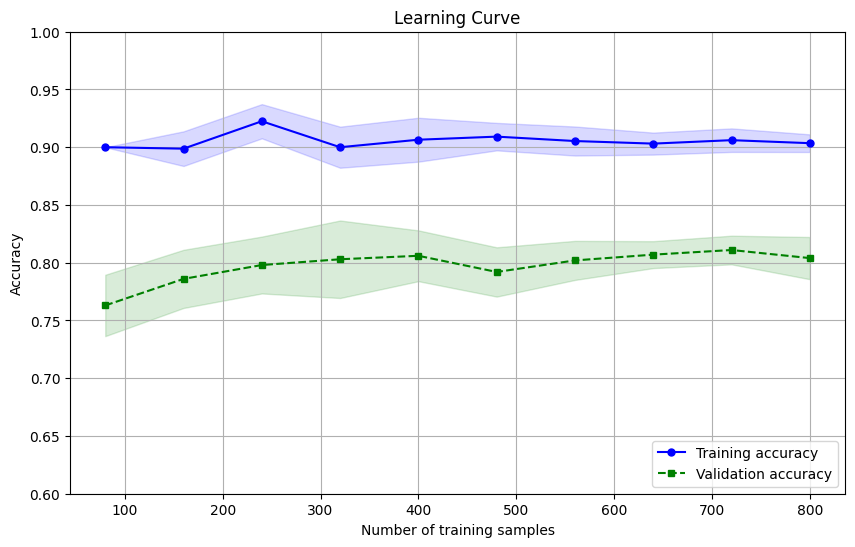

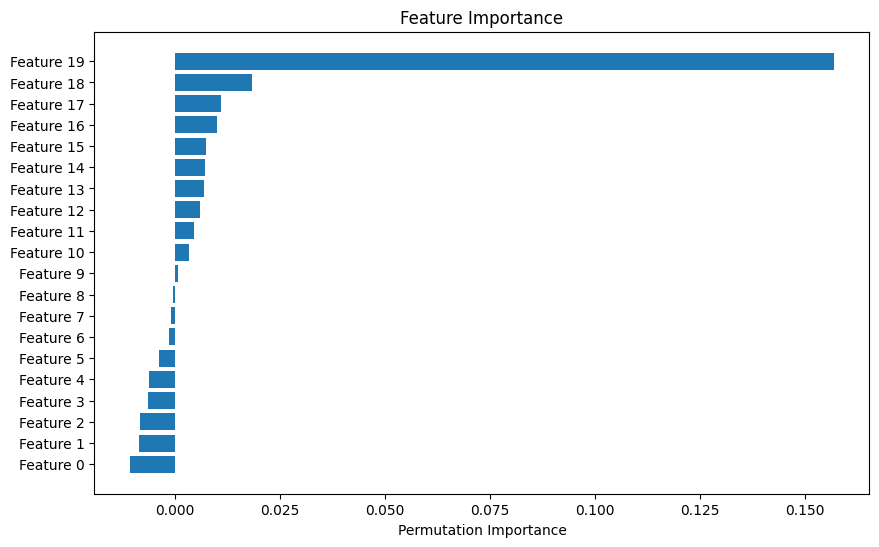

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
                            confusion_matrix, roc_curve, auc, precision_recall_curve, \
                            mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance

# Function to generate sample dataset
def generate_sample_data():
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    return X, y

# Function to train KNN model
def train_knn_model(X_train, y_train, k=3):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    return knn_model

# Function to evaluate model performance
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    mean_abs_err = mean_absolute_error(y_test, y_pred)
    mean_sqr_err = mean_squared_error(y_test, y_pred)
    root_mean_sqr_err = np.sqrt(mean_sqr_err)
    r_squared = r2_score(y_test, y_pred)

    return accuracy, precision, recall, f1, confusion_mat, mean_abs_err, \
           mean_sqr_err, root_mean_sqr_err, r_squared

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Function to plot learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            verbose=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.6, 1.0])
    plt.title('Learning Curve')
    plt.show()

# Function to calculate feature importance
def calculate_feature_importance(model, X_train, y_train):
    perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    features = [f'Feature {i}' for i in range(X_train.shape[1])]

    plt.figure(figsize=(10, 6))
    plt.barh(features, perm_importance.importances_mean[sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance')
    plt.show()

# Main function
def main():
    # Generate sample dataset
    X, y = generate_sample_data()

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train KNN model
    knn_model = train_knn_model(X_train, y_train)

    # Evaluate model performance
    accuracy, precision, recall, f1, confusion_mat, mean_abs_err, mean_sqr_err, \
    root_mean_sqr_err, r_squared = evaluate_model_performance(knn_model, X_test, y_test)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("Mean Absolute Error:", mean_abs_err)
    print("Mean Squared Error:", mean_sqr_err)
    print("Root Mean Squared Error:", root_mean_sqr_err)
    print("R-squared:", r_squared)

    # Plot ROC curve
    plot_roc_curve(knn_model, X_test, y_test)

    # Plot Precision-Recall curve
    plot_precision_recall_curve(knn_model, X_test, y_test)

    # Plot learning curve
    plot_learning_curve(knn_model, X, y)

    # Calculate feature importance
    calculate_feature_importance(knn_model, X_train, y_train)

if __name__ == "__main__":
    main()
